In [10]:
import pandas as pd

df = pd.read_csv('DS3_weapon.csv')

print("Первые 5 строк:")
print(df.head())

print("\nПоследние 5 строк:")
print(df.tail())

print("\nInfo:")
df.info()

Первые 5 строк:
                     Name       Category Reinforcement        Damage  \
0                    Fist          Fists       Regular    20/0/0/0/0   
1       Dragonhead Shield  Small Shields          Boss  116/0/12/0/0   
2  Dragonhead Greatshield   Greatshields          Boss   145/0/0/0/0   
3         White Birch Bow           Bows        Unique    82/0/0/0/0   
4    Preacher's Right Arm         Staves        Unique   109/0/0/0/0   

  Damage Reduction Aux Effects Stat Requirements Stat Bonuses  Critical  \
0        0/0/0/0/0       0/0/0           0/0/0/0      -/-/-/-       100   
1   70/65/90/35/55       0/0/0        12/0/11/12      D/-/E/E       100   
2  100/55/90/30/55       0/0/0         35/0/0/15      D/-/-/E       100   
3        -/-/-/-/-       0/0/0          8/20/0/0      E/D/-/-       100   
4   25/20/10/10/15       0/0/0         12/0/14/0      E/-/A/-       100   

   Weight Stability  Durability  Sell Price  Spell Buff  Range Buffable  \
0     0.0         0      

In [11]:
import numpy as np

# ищем пропуски
# df.method({col: value}, inplace=True)
df['Stability'] = pd.to_numeric(df['Stability'], errors='coerce')

print("\Пустые значения:")
print(df.isnull().sum())

# заполняем пропуски медианным значением
median_sell_price = df['Sell Price'].median()
df.fillna({"Sell Price":median_sell_price}, inplace=True)

df.fillna({"Spell Buff":0}, inplace=True)
df.fillna({"Range": 0}, inplace=True)

median_stability = df['Stability'].median()
df.fillna({"Stability":median_stability}, inplace=True)

print("\nПосле заполнения медианным значением:")
print(df.isnull().sum())

df.info()

\Пустые значения:
Name                   0
Category               0
Reinforcement          0
Damage                 0
Damage Reduction       0
Aux Effects            0
Stat Requirements      0
Stat Bonuses           0
Critical               0
Weight                 0
Stability             14
Durability             0
Sell Price             1
Spell Buff           254
Range                270
Buffable               0
Infusable              0
dtype: int64

После заполнения медианным значением:
Name                 0
Category             0
Reinforcement        0
Damage               0
Damage Reduction     0
Aux Effects          0
Stat Requirements    0
Stat Bonuses         0
Critical             0
Weight               0
Stability            0
Durability           0
Sell Price           0
Spell Buff           0
Range                0
Buffable             0
Infusable            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 17 column

In [12]:
print("Количество строк с дубликатами:", df.duplicated().sum())

if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("Дубликаты удалены.")
else:
    print("Дубликатов не найдено.")

Количество строк с дубликатами: 0
Дубликатов не найдено.


In [13]:
print("Описательная статистика:")
print(df.describe())

Описательная статистика:
         Critical      Weight   Stability  Durability   Sell Price  \
count  287.000000  287.000000  287.000000  287.000000   287.000000   
mean   100.923345    6.695122   32.045296   81.602787   382.874564   
std      4.023668    5.795789   15.917446   50.884234   394.358342   
min    100.000000    0.000000    0.000000    0.000000     0.000000   
25%    100.000000    2.500000   20.000000   55.000000   100.000000   
50%    100.000000    5.000000   30.000000   70.000000   200.000000   
75%    100.000000    9.000000   41.000000   90.000000   500.000000   
max    130.000000   28.000000   80.000000  500.000000  2000.000000   

       Spell Buff       Range  
count  287.000000  287.000000  
mean    24.937282    2.874564  
std     70.928479   11.625190  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      0.000000    0.000000  
max    312.000000   63.000000  


In [14]:
print("\nУникальные значения и их частота для категориальных столбцов:")

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Уникальные значения и их частота для категориальных столбцов:

Column: Name
Name
Battle Axe                      1
Fist                            1
Dragonhead Shield               1
Dragonhead Greatshield          1
White Birch Bow                 1
                               ..
Murky Longstaff                 1
Aquamarine Dagger               1
Harald Curved Greatsword        1
Demon's Scar                    1
Ringed Knight Straight Sword    1
Name: count, Length: 287, dtype: int64

Column: Category
Category
Normal Shields        29
Small Shields         18
Straight Swords       17
Greatswords           16
Spears                16
Greatshields          16
Curved Swords         15
Great Hammers         14
Daggers               13
Staves                12
Ultra Greatswords     11
Halberds              11
Axes                  10
Katanas                8
Hammers                8
Bows                   7
Chimes                 7
Crossbows              7
Greataxes              7
Tal

In [15]:
print("\nКорреляционный анализ:")

all_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[all_cols].corr()
print(correlation_matrix)



Корреляционный анализ:
            Critical    Weight  Stability  Durability  Sell Price  Spell Buff  \
Critical    1.000000 -0.184674  -0.186545   -0.119966   -0.103482   -0.056215   
Weight     -0.184674  1.000000   0.518519    0.724464    0.307336   -0.299832   
Stability  -0.186545  0.518519   1.000000    0.485610    0.046147   -0.396192   
Durability -0.119966  0.724464   0.485610    1.000000    0.219112   -0.193469   
Sell Price -0.103482  0.307336   0.046147    0.219112    1.000000    0.026122   
Spell Buff -0.056215 -0.299832  -0.396192   -0.193469    0.026122    1.000000   
Range      -0.056942 -0.052724  -0.275637   -0.117817    0.016610   -0.087240   

               Range  
Critical   -0.056942  
Weight     -0.052724  
Stability  -0.275637  
Durability -0.117817  
Sell Price  0.016610  
Spell Buff -0.087240  
Range       1.000000  


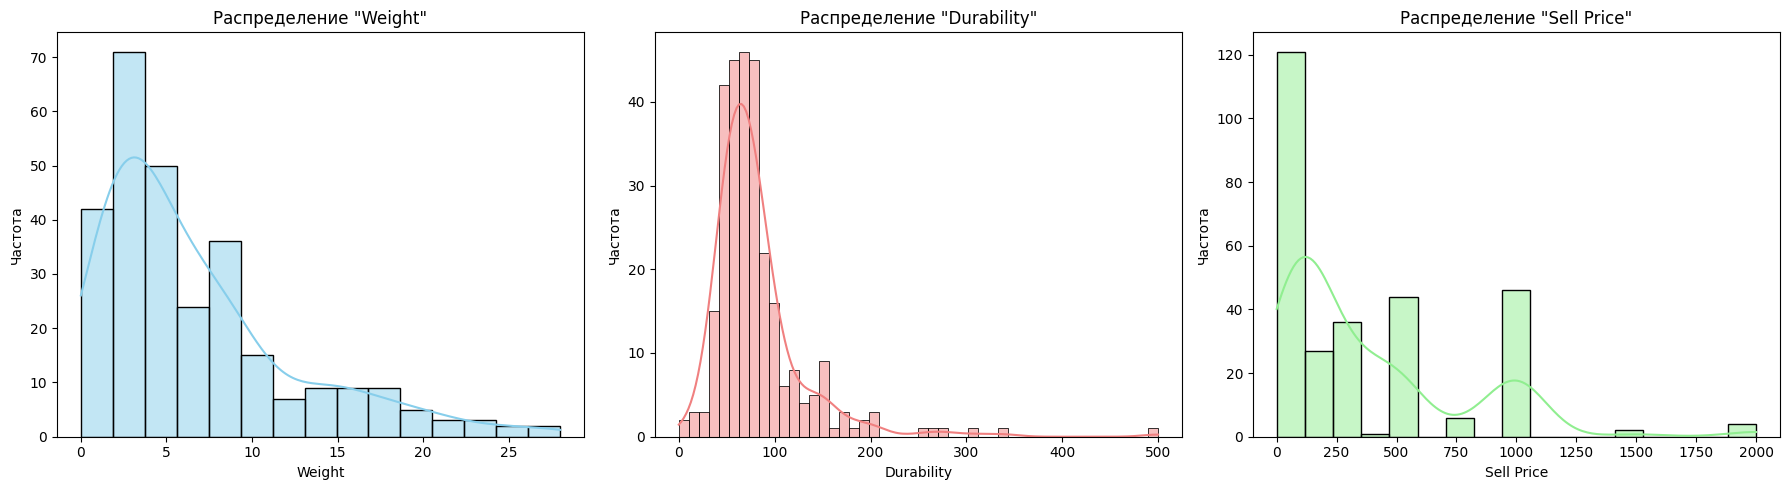

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Weight'], kde=True, color='skyblue')
plt.title('Распределение "Weight"')
plt.xlabel('Weight')
plt.ylabel('Частота')

plt.subplot(1, 3, 2)
sns.histplot(df['Durability'], kde=True, color='lightcoral')
plt.title('Распределение "Durability"')
plt.xlabel('Durability')
plt.ylabel('Частота')

plt.subplot(1, 3, 3)
sns.histplot(df['Sell Price'], kde=True, color='lightgreen')
plt.title('Распределение "Sell Price"')
plt.xlabel('Sell Price')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()

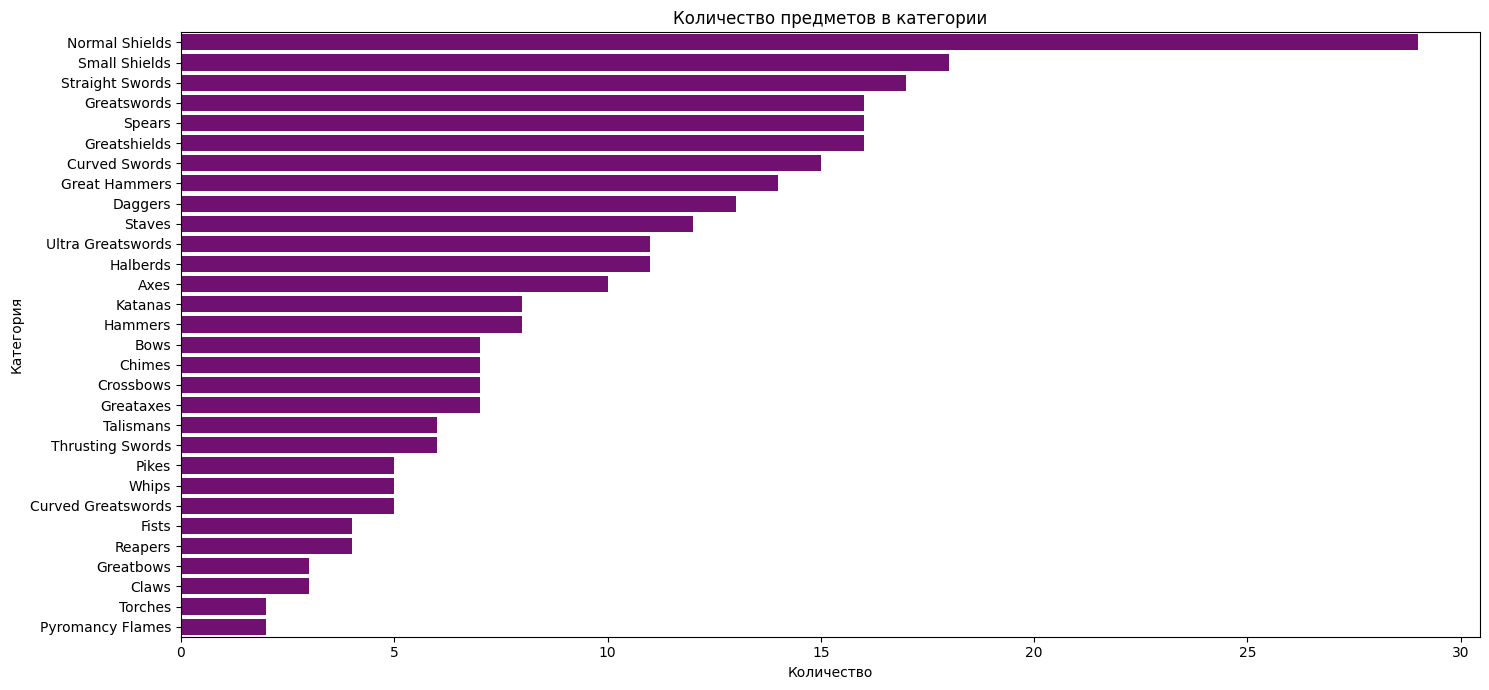

In [21]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, y='Category', order=df['Category'].value_counts().index, color='Purple')
plt.title('Количество предметов в категории')
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.tight_layout()
plt.show()

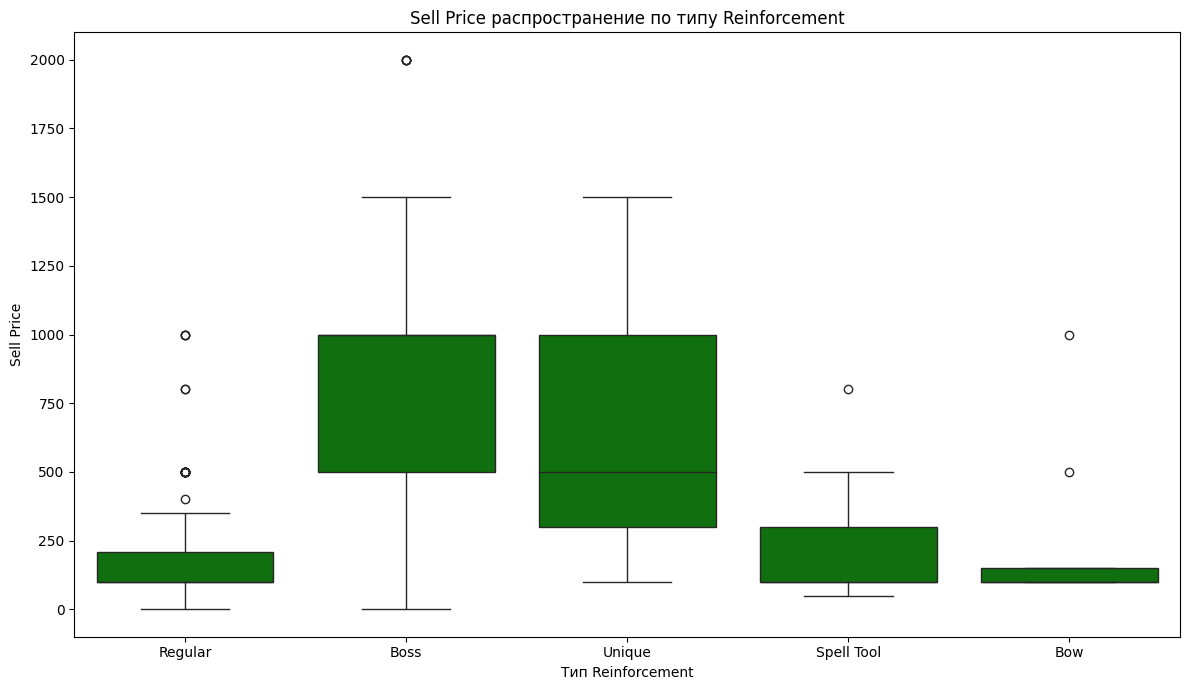

In [32]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Reinforcement', y='Sell Price', color='Green')
plt.title('Sell Price распространение по типу Reinforcement')
plt.xlabel('Тип Reinforcement')
plt.ylabel('Sell Price')
plt.tight_layout()
plt.show()

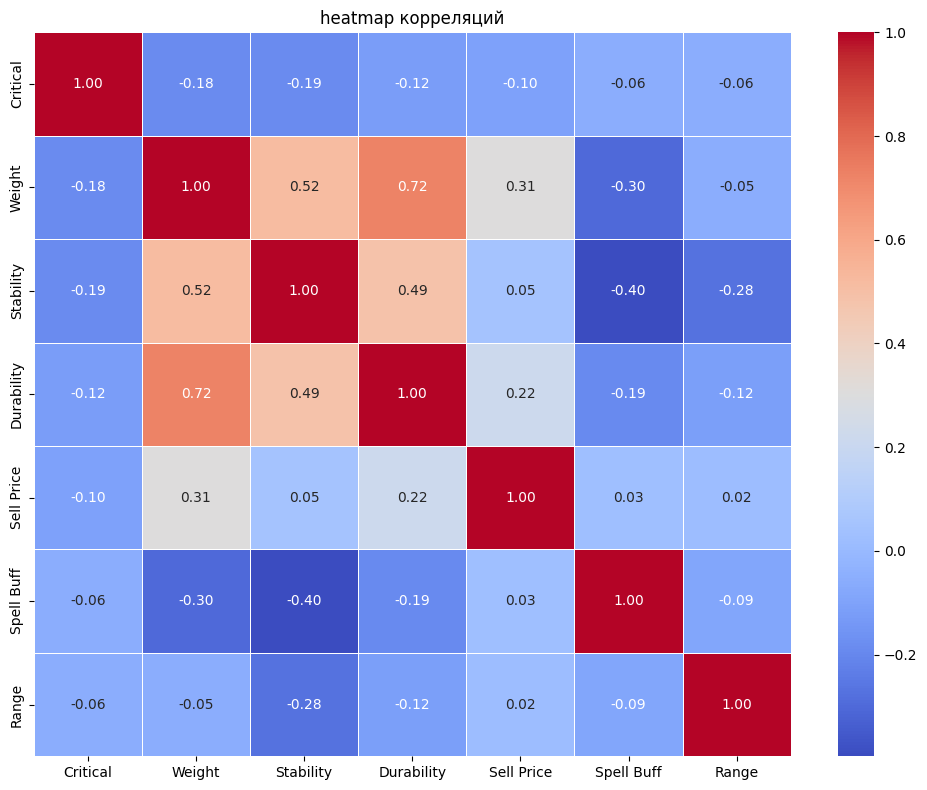

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('heatmap корреляций')
plt.tight_layout()
plt.show()

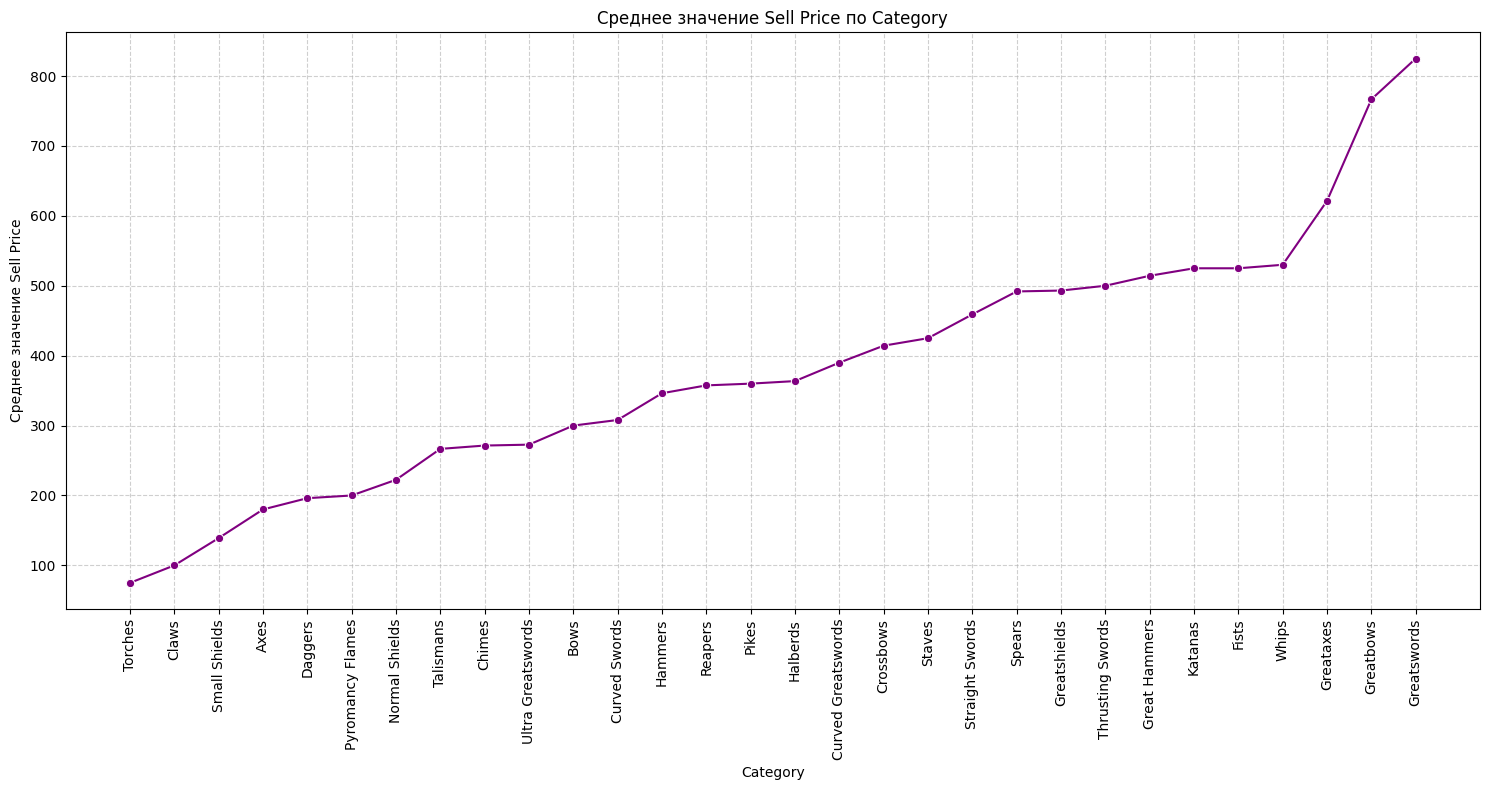

In [34]:
avg_sell_price_by_category = df.groupby('Category')['Sell Price'].mean().sort_values()

plt.figure(figsize=(15, 8))
sns.lineplot(x=avg_sell_price_by_category.index, y=avg_sell_price_by_category.values, marker='o', color='purple')
plt.title('Среднее значение Sell Price по Category')
plt.xlabel('Category')
plt.ylabel('Среднее значение Sell Price')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [36]:
print("\nСреднее значение Sell Price для Category:")
avg_sell_price_by_category = df.groupby('Category')['Sell Price'].mean().sort_values(ascending=False)
print(avg_sell_price_by_category.head())

print("\nМаксимальное значение Weight для Reinforcement Type:")
max_weight_by_reinforcement = df.groupby('Reinforcement')['Weight'].max().sort_values(ascending=False)
print(max_weight_by_reinforcement)

print("\nКоличество значений Items для Buffable Status:")
count_by_buffable = df.groupby('Buffable').size().reset_index(name='Count')
print(count_by_buffable)


Среднее значение Sell Price для Category:
Category
Greatswords    825.000000
Greatbows      766.666667
Greataxes      621.428571
Whips          530.000000
Katanas        525.000000
Name: Sell Price, dtype: float64

Максимальное значение Weight для Reinforcement Type:
Reinforcement
Unique        28.0
Boss          26.0
Regular       21.5
Bow            7.5
Spell Tool     3.0
Name: Weight, dtype: float64

Количество значений Items для Buffable Status:
  Buffable  Count
0       No    118
1      Yes    169
